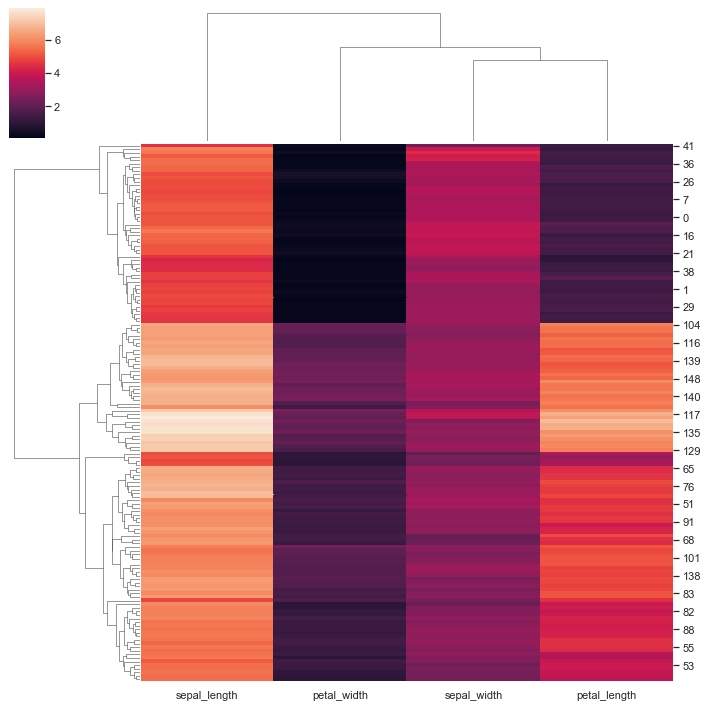

In [2]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

In [24]:
ax.ax_row_dendrogram.add_line(5)

AttributeError: 'int' object has no attribute 'set_figure'

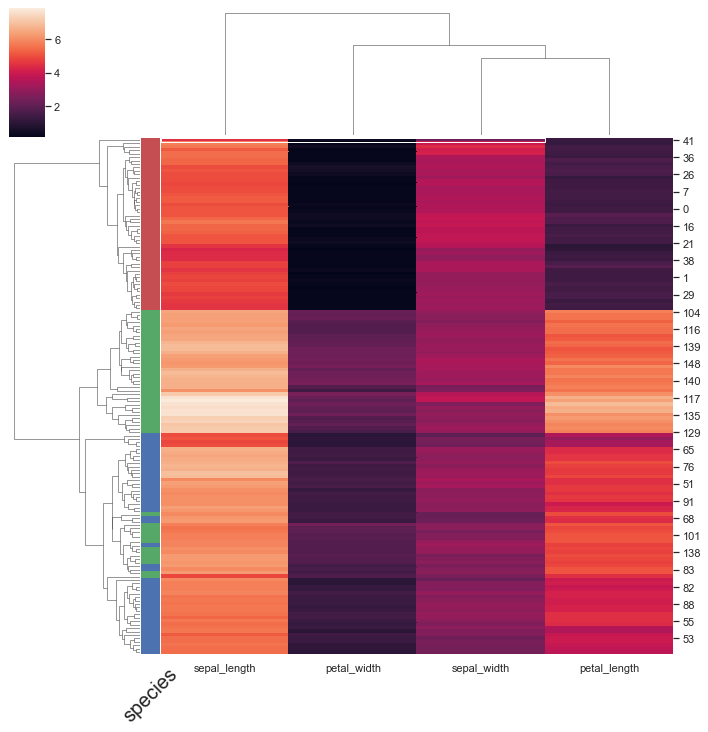

In [95]:
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
ax=sns.clustermap(iris, row_colors=row_colors)
# ax.ax_row_colors.get_yticklabels().set_fontsize(150)
# ax.ax_col_colors.get_yticklabels().set_fontsize(150)
ax1=ax.ax_row_colors
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(20)
    item.set_rotation(45)
    item.set_horizontalalignment("center")
# l = plt.axhline(y=13, c='k')
# ax.ax_row_dendrogram.add_line(l)
from matplotlib.patches import Rectangle
ax.ax_heatmap.add_patch(Rectangle((0, 0), 3, 1, fill=False, edgecolor='white', lw=1))
plt.show()

In [7]:
row_colors

0      r
1      r
2      r
3      r
4      r
      ..
145    g
146    g
147    g
148    g
149    g
Name: species, Length: 150, dtype: object

In [8]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
g.ax_row_dendrogram.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

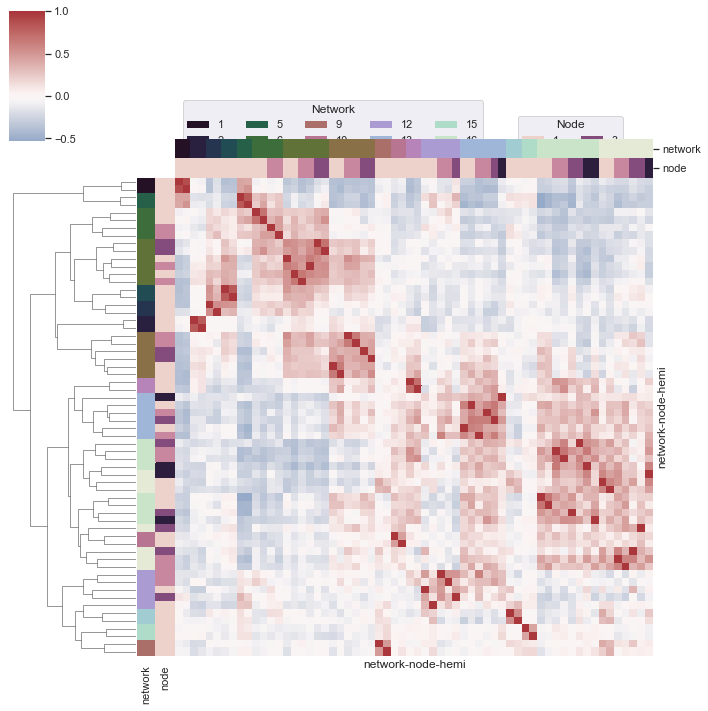

In [67]:
networks = sns.load_dataset("brain_networks", index_col=0, header=[0, 1, 2])
network_labels = networks.columns.get_level_values("network")
network_pal = sns.cubehelix_palette(network_labels.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
network_lut = dict(zip(map(str, network_labels.unique()), network_pal))
# Create index using the columns for networks
network_colors = pd.Series(network_labels, index=networks.columns).map(network_lut)
# node level
node_labels = networks.columns.get_level_values("node")
node_pal = sns.cubehelix_palette(node_labels.unique().size)
node_lut = dict(zip(map(str, node_labels.unique()), node_pal))
# Create index using the columns for nodes
node_colors = pd.Series(node_labels, index=networks.columns).map(node_lut)
# Create dataframe for row and column color levels
network_node_colors = pd.DataFrame(network_colors).join(pd.DataFrame(node_colors))
# create clustermap
g = sns.clustermap(networks.corr(),
# Turn off the clustering
row_cluster=True, col_cluster=False,
# Add colored class labels using data frame created from node and network colors
row_colors = network_node_colors,
col_colors = network_node_colors,
# Make the plot look better when many rows/cols
linewidths=0,
xticklabels=False, yticklabels=False,
center=0, cmap="vlag")
# create two legends - one for each level by creating invisible column and row barplots (as per above)
# network legend
for label in network_labels.unique():
    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label], label=label, linewidth=0)

l1 = g.ax_col_dendrogram.legend(title='Network', loc="center", ncol=5, bbox_to_anchor=(0.47, 0.8), bbox_transform=plt.gcf().transFigure)
# node legend
for label in node_labels.unique():
    g.ax_row_dendrogram.bar(0, 0, color=node_lut[label], label=label, linewidth=0)

l2 = g.ax_row_dendrogram.legend(title='Node', loc="center", ncol=2,bbox_to_anchor=(0.8, 0.8), bbox_transform=plt.gcf().transFigure)

# g.ax_row_dendrogram.


plt.show()

In [27]:
network_node_colors

network  \
network node hemi                                                      
1       1    lh    [0.14250609166695374, 0.06696404307500585, 0.1...   
             rh    [0.14250609166695374, 0.06696404307500585, 0.1...   
2       1    lh    [0.16155595934115108, 0.12444369703732092, 0.2...   
             rh    [0.16155595934115108, 0.12444369703732092, 0.2...   
3       1    lh    [0.14490368795926326, 0.2065088491953011, 0.31...   
...                                                              ...   
17      2    lh    [0.8955408221495149, 0.9180142943633274, 0.833...   
             rh    [0.8955408221495149, 0.9180142943633274, 0.833...   
        3    lh    [0.8955408221495149, 0.9180142943633274, 0.833...   
             rh    [0.8955408221495149, 0.9180142943633274, 0.833...   
        4    lh    [0.8955408221495149, 0.9180142943633274, 0.833...   

                                                                node  
network node hemi                                                     
1       1    lh    [0.9312692223325372, 0.8201921796082118, 0.797...  
             rh    [0.9312692223325372, 0.8201921796082118, 0.797...  
2       1    lh    [0.9312692223325372, 0.8201921796082118, 0.797...  
             rh    [0.9312692223325372, 0.8201921796082118, 0.797...  
3       1    lh    [0.9312692223325372, 0.8201921796082118, 0.797...  
...                                                              ...  
17      2    lh    [0.7840440880599453, 0.5292660544265891, 0.620...  
             rh    [0.7840440880599453, 0.5292660544265891, 0.620...  
        3    lh    [0.5151069036855755, 0.29801047535056074, 0.49...  
             rh    [0.5151069036855755, 0.29801047535056074, 0.49...  
        4    lh    [0.1750865648952205, 0.11840023306916837, 0.24...  

[62 rows x 2 columns]